In [2]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

C:\Users\makal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [21]:
BOTTLE_NECK_SIZE = 25

In [22]:
(img_train, value_train), (img_test, value_test) = tf.keras.datasets.mnist.load_data()
img_train = img_train/255.0
img_test = img_test/255.0

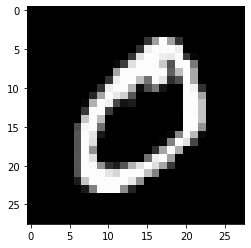

In [23]:
plt.imshow(img_train[1], cmap=plt.cm.gray)


In [39]:
autoencoder = tf.keras.models.Sequential()
autoencoder.add(tf.keras.layers.Flatten())
autoencoder.add(tf.keras.layers.Dense(BOTTLE_NECK_SIZE, activation='relu'))
autoencoder.add(tf.keras.layers.Dense(BOTTLE_NECK_SIZE, activation='relu'))
autoencoder.add(tf.keras.layers.Dense(28*28, activation='relu'))
autoencoder.add(tf.keras.layers.Reshape((28, 28, 1)))
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(img_train, img_train, epochs=4)
autoencoder.build()
autoencoder.summary()

Epoch 1/4
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0298
Epoch 2/4
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0212
Epoch 3/4
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0200
Epoch 4/4
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0197
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (32, 784)                 0         
                                                                 
 dense_9 (Dense)             (32, 25)                  19625     
                                                                 
 dense_10 (Dense)            (32, 25)                  650       
                                                                 
 dense_11 (Dense)            (32, 784)                 20384     
                                                        

In [40]:
results = autoencoder.predict(img_train)

1875/1875 [==============================] - 5s 3ms/step


INPUT:


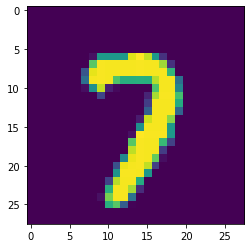

OUTPUT:


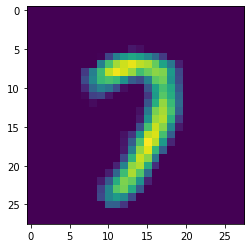

In [53]:
result_number = np.random.randint(1875, size=1)[0]
print('INPUT:')
plt.imshow(img_train[result_number])
plt.show()
print('OUTPUT:')
plt.imshow(results[result_number])
plt.show()